# Merge ranking files 

## Dependencies and data manipulation

### Major Findings:

#### Demographics, Schools and Housing Affordability:

- Washington D.C had the highest percentage of population over 25 years of age with education level of Bachelor's or higher.
- Compared to the other cities Washington D.C had the highest percentage of its labor force in technology, business and financial occupations. In other words, D.C ranks ranks first in terms of providing local talent for hiring.
- New York is the safest city with the least crime index.
- All the cities we identified are very diverse with little variation in the diversity index.
- Affordable housing and rent follow the same trend for all cities. Raleigh ranks highest in terms of affordable housing.
- School with higher average ratings are in Austin and Los Angeles.
- Colleges with higher average ratings are in Raleigh and Los Angeles.

#### Amenities:
- New York, Chicago & Boston were consistently top cities for most of the amenities.
- Los Angeles resulted in no lodging facility within 2 mile radius of any of its site.
- Washington DC resulted with the worst parking facility within 2 mile radius of its site.

#### Environment Index Observations:
- Most cities with higher Climate Index also tends to have a very high Pollution Index, which is highly contradictory - in decision making based on environment preferences.
- Raleigh fairs well amongst all as it has Climate Index and lower Pollution Index.

#### Transportation:
- New York ranks highest in terms of Walk, Bike and Transit scores.
- Los Angeles ranks highest in terms of access to both national and international airports.

#### Housing and Schools
- Consistent trend of home ownership and rent costs. Raleigh, Austin, and Washington ranked top 3
- Atlanta and Los Angeles rated among the top on scores for overall schools and college ratings
- Austin is listed by Grater Schools as the city with highest average rating per Amazon sites.
- Colleges in nearby sites per Amazon city ranked highest for Raleigh  by Google ratings. 


#### Final Scores: 

Each city was assigned a score between 1 to 8 for each of the metrics. For instance, Atlanta which has the highest crime index or in other words, the least safe city in our list got a score of 1 while New York, which has the lowest crime index got a score of 8. We tallied up the total score for each city. New York emerged as the most favored city. 

Once we scored the cities for each of the metrics, we calculated the total score.

We had overall 17 categories on which to rank a city, to ensure that consideration for categories are more in line with potential talent attraction, we added weights to each category. For instance Technical Attainment and Home Affordability are categories that weigh more than certain amenities. 

The overall ranking is then adjusted to show the weighted score for each city. In which case Raleigh and Washington DC rank among the top.







In [1]:
import os
import pandas as pd

In [2]:
# Input filenames
house_school_rank_file = os.path.join("Results","house_afford_school_ranking.csv")
city_demographic_file = os.path.join("Results","Cities_Demographics_Scores.csv")
amenities_file = os.path.join("Results","Final City Ranking for Amenities.csv")
transport_file = os.path.join("Results","Transport.csv")
environment_file = os.path.join("Results", "Final City Ranking for Environment.csv")
weightfile = os.path.join("Results","weights.csv")

In [3]:
# Output filenames
combined_rank_file = os.path.join("Results","combined_ranking.csv")
combined_ranking_visual_file = os.path.join("Plots","combined_ranking_all_visual.png")
total_ranking_visual_file = os.path.join("Plots","combined_ranking_total_visual.png")
weighted_ranking_visual_file = os.path.join("Plots","combined_ranking_weighted_visual.png")

In [4]:
def clean(ranking_data):
    if 'Unnamed: 0' in ranking_data.columns:
        ranking_data = ranking_data.drop('Unnamed: 0', axis=1)
    if 'NAME' in ranking_data.columns:
        ranking_data = ranking_data.drop('NAME', axis=1)
    if 'Crime Rate' in ranking_data.columns:
        ranking_data = ranking_data.drop('Crime Rate', axis=1)
    if 'Climate Index' in ranking_data.columns:
        ranking_data = ranking_data.drop('Climate Index', axis=1)
    if 'Pollution Index' in ranking_data.columns:
        ranking_data = ranking_data.drop('Pollution Index', axis=1)
    if 'Total Score' in ranking_data.columns:
        ranking_data = ranking_data.drop('Total Score', axis=1)
    if 'Final Rank' in ranking_data.columns:
        ranking_data = ranking_data.drop('Final Rank', axis=1)
        
    if 'City Name' in ranking_data.columns:
        ranking_data = ranking_data.rename(columns={'City Name':'City'})                                         
    return ranking_data

In [5]:
def Read_ranking(filename, show_raw=False):
    raw_data =  pd.read_csv(filename)
    if show_raw:
        display(raw_data)
    data=clean(raw_data)
    return(data)

In [6]:
def add_ranks(data1, data2, data3, data4, data5):
    combined_rank = pd.merge(data1, data2, on='City')
    combined_rank = combined_rank.merge(data3, on= 'City')
    combined_rank = combined_rank.merge(data4, on = 'City')
    combined_rank = combined_rank.merge(data5, on = 'City')
    return combined_rank

In [7]:
def Visual_all_ranking(filename):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np    
    
    c = pd.read_csv(filename)
    c = c.drop('Unnamed: 0', axis=1)
    # make the city the index
    c = c.set_index('City')
    # ensure valus are integers and not strings
    c = c.apply(pd.to_numeric)
    # prefix all column names with same string
    for col in c.columns: 
        c=c.rename(columns={col:'rating_'+col})
    # prepare for visual
    c = c.reset_index()
    c = c.melt('City', var_name='rating', value_name='vals')
    g = sns.factorplot(kind='bar',x="vals", y='City',hue='rating', data=c, size=10)
    plt.savefig('combined_ranking_all_visual',bbox_inches='tight')
    plt.show()

In [8]:
def Total_visual(total, visualfile):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    sns.barplot(x='total',y='City',data=total)
    plt.savefig(visualfile,bbox_inches='tight')
    plt.show()
    

In [9]:
def Total_ranking(filename):

    c = pd.read_csv(filename)
    c = c.drop('Unnamed: 0', axis=1)
    # make the city the index
    c = c.set_index('City')
    # ensure valus are integers and not strings
    c = c.apply(pd.to_numeric)
    # Compute totals for each city
    c['total']=0
    for col in c.columns:
        c['total']=c['total']+c[col]
        
    # Drop all columns, only need the totals
    total = c[['total']]
    total = total.sort_values('total', ascending=False)
    total = total.reset_index()

    return(total)
    
    
def load_weights(weightfile):
    weights = pd.read_csv(weightfile)
    weights= weights.apply(pd.to_numeric)
    return weights

def Weighted_total(filename, weightfile):
    ranking = pd.read_csv(filename)
    ranking = ranking.drop('Unnamed: 0', axis=1)
    # make the city the index
    ranking = ranking.set_index('City')
    # ensure valus are integers and not strings
    ranking = ranking.apply(pd.to_numeric)
    rankcolumns = ranking.columns
    
    # load weights
    w = load_weights(weightfile)

    ranking = ranking.reset_index()
    # Compute totals for each city
    final_ranking=[]
    for index, row in ranking.iterrows():
        total = 0
        for c in rankcolumns:
            number = row[c] * w[c]
            total = total + number
        final_ranking.append({'City':row['City'],
                              'total':total[0]})
    
    final_df = pd.DataFrame(final_ranking)    
    total = final_df.sort_values("total", ascending=False)
    total=total.reset_index()
    total=total.drop("index",axis=1)
    return total
    
    

# Read data

In [10]:
house_school_rank = Read_ranking(house_school_rank_file)
demographic_rank = Read_ranking(city_demographic_file)
amenities_rank = Read_ranking(amenities_file)
transport_rank = Read_ranking(transport_file)
environment_rank = Read_ranking(environment_file)


In [11]:
combined_rank = add_ranks(house_school_rank,
              demographic_rank,
              amenities_rank,
              transport_rank,
              environment_rank)
combined_rank.to_csv(combined_rank_file)

# Totals
## Raw Totals

In [12]:
ranking = Total_ranking(combined_rank_file)
ranking

,City,total
0,New York,170
1,Raleigh,162
2,Washington DC,162
3,Chicago,160
4,Boston,154
5,Austin,142
6,Atlanta,136
7,Los Angeles,132


## Weighted Totals

In [13]:
weighted = Weighted_total(combined_rank_file, weightfile)
weighted

,City,total
0,Raleigh,127.75
1,Washington DC,116.00
2,Austin,104.75
3,Atlanta,100.50
4,New York,91.50
5,Chicago,89.00
6,Boston,87.75
7,Los Angeles,71.75


# Visuals 
## All rankings visual

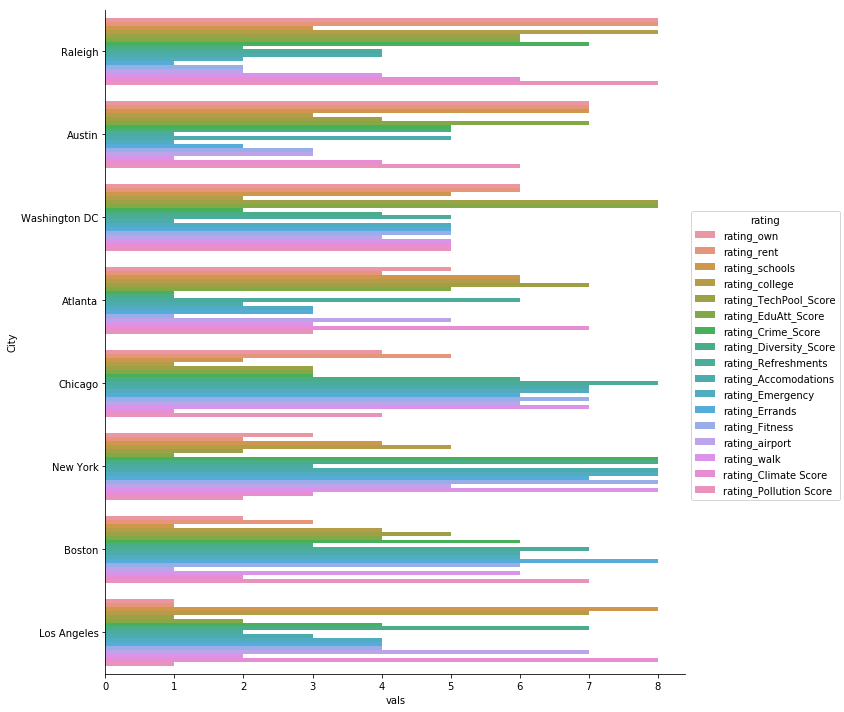

In [14]:
Visual_all_ranking(combined_rank_file)

## Visual Totals

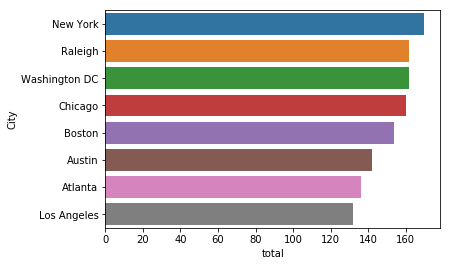

In [15]:
Total_visual(ranking,total_ranking_visual_file)

## Weighted Total Visual

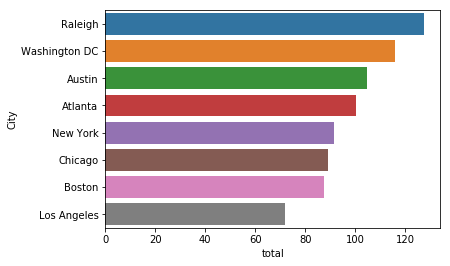

In [16]:
Total_visual(weighted,weighted_ranking_visual_file)